In [34]:
import pandas as pd
import geopandas as gpd
import maup
from maup import smart_repair
import time
import os
import matplotlib.pyplot as plt
import networkx as nx
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, Election
from gerrychain.updaters import cut_edges, Tally
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
import time
from gerrychain.tree import bipartition_tree

In [35]:
markov_chain_50000 = pd.read_csv('./markov_chain_ensemble_results50000.csv')
markov_chain_40000 = pd.read_csv('./markov_chain_ensemble_results40000.csv')

In [36]:
print(markov_chain_50000["Cut Edges"].head())
print(markov_chain_50000["Presidential Democratic Districts"].head())
print(markov_chain_50000["Presidential Republican Districts"].head())
print(markov_chain_50000["Presidential Efficiency Gap"].head())
print(markov_chain_50000["Governor Democratic Districts"].head())
print(markov_chain_50000["Governor Republican Districts"].head())
print(markov_chain_50000["Governor Efficiency Gap"].head())

0    672.0
1    704.0
2    684.0
3    690.0
4    709.0
Name: Cut Edges, dtype: float64
0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Presidential Democratic Districts, dtype: float64
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: Presidential Republican Districts, dtype: float64
0   -0.267221
1   -0.261475
2   -0.261475
3   -0.261475
4   -0.261475
Name: Presidential Efficiency Gap, dtype: float64
0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: Governor Democratic Districts, dtype: float64
0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: Governor Republican Districts, dtype: float64
0   -0.140447
1   -0.134702
2   -0.134702
3   -0.134702
4   -0.128801
Name: Governor Efficiency Gap, dtype: float64


In [37]:
print(markov_chain_40000["Cut Edges"].head())
print(markov_chain_40000["Presidential Democratic Districts"].head())
print(markov_chain_40000["Presidential Republican Districts"].head())
print(markov_chain_40000["Presidential Efficiency Gap"].head())
print(markov_chain_40000["Governor Democratic Districts"].head())
print(markov_chain_40000["Governor Republican Districts"].head())
print(markov_chain_40000["Governor Efficiency Gap"].head())

0    672.0
1    577.0
2    679.0
3    681.0
4    693.0
Name: Cut Edges, dtype: float64
0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Presidential Democratic Districts, dtype: float64
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: Presidential Republican Districts, dtype: float64
0   -0.267221
1   -0.267221
2   -0.267221
3   -0.268357
4   -0.265776
Name: Presidential Efficiency Gap, dtype: float64
0    3.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Governor Democratic Districts, dtype: float64
0    5.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: Governor Republican Districts, dtype: float64
0   -0.140447
1   -0.259437
2   -0.259437
3   -0.260625
4   -0.258017
Name: Governor Efficiency Gap, dtype: float64


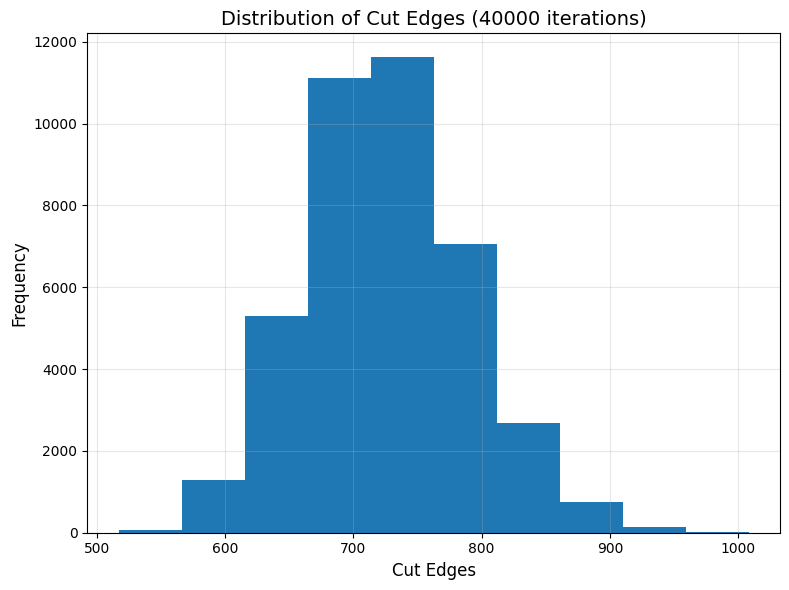

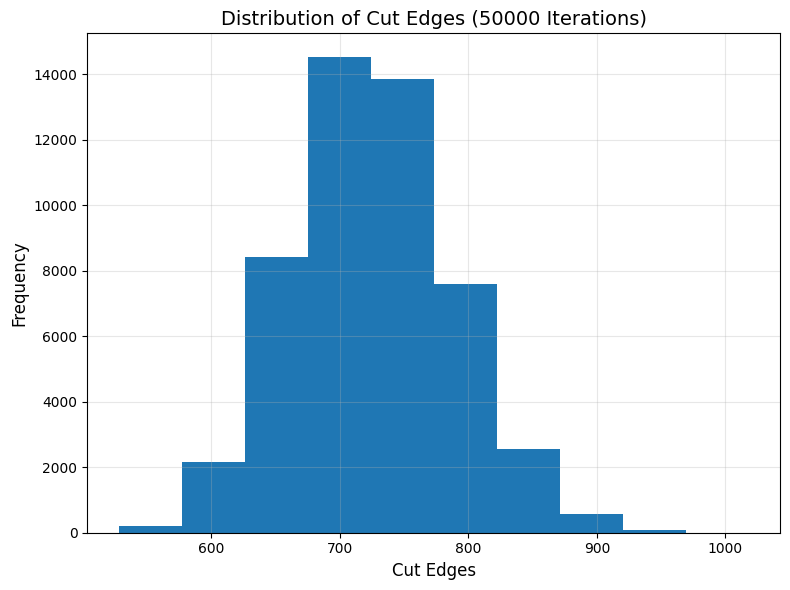

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(markov_chain_40000["Cut Edges"], bins=10, align='mid')
plt.subplots_adjust(left=0.15, right=0.85)
plt.title("Distribution of Cut Edges (40000 iterations)", fontsize=14)
plt.xlabel("Cut Edges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(markov_chain_50000["Cut Edges"], bins=10, align='mid')
plt.subplots_adjust(left=0.15, right=0.85)
plt.title("Distribution of Cut Edges (50000 Iterations)", fontsize=14)
plt.xlabel("Cut Edges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

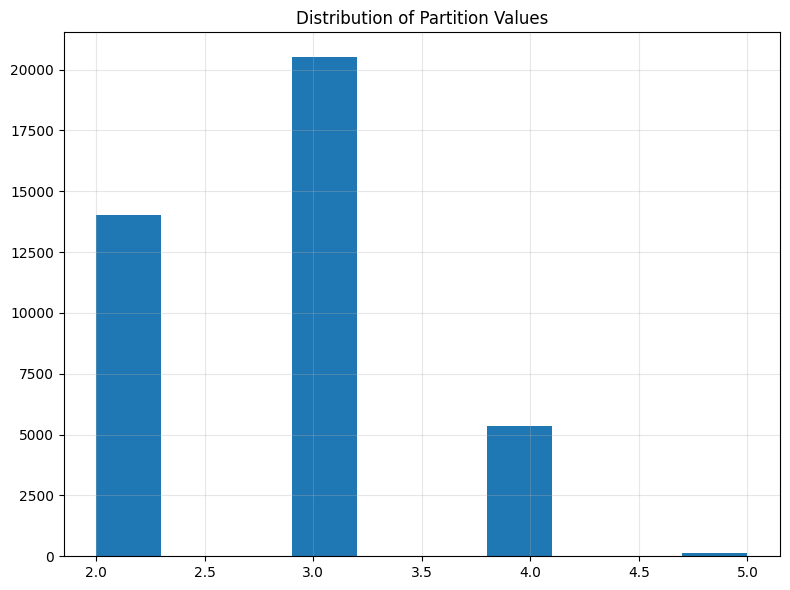

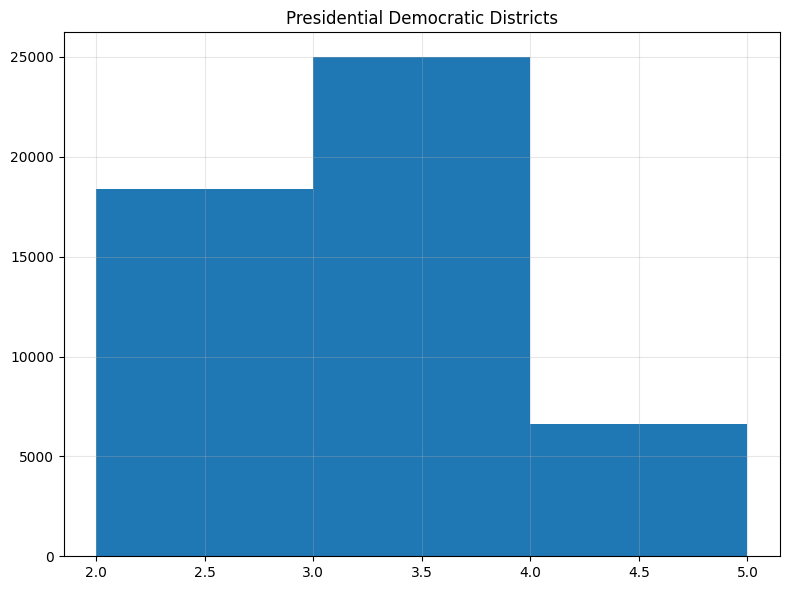

In [45]:
plt.figure(figsize=(8, 6))  # Larger figure for better presentation
plt.hist(markov_chain_40000["Presidential Democratic Districts"], align='mid', rwidth=1)  # Change 'left' to 'mid' to center bars
plt.title("Distribution of Partition Values")
plt.grid(alpha=0.3)
plt.tight_layout()  # Ensures proper spacing
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(markov_chain_50000["Presidential Democratic Districts"], bins=3, align='mid', rwidth=1)
plt.title("Presidential Democratic Districts")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

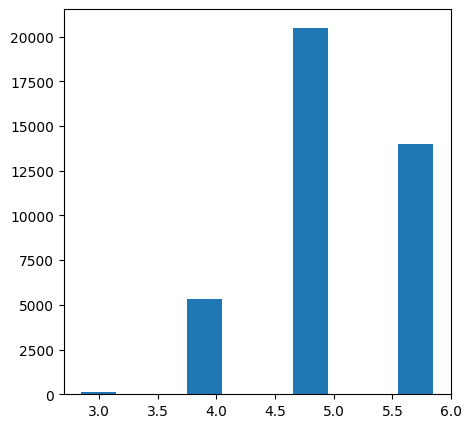

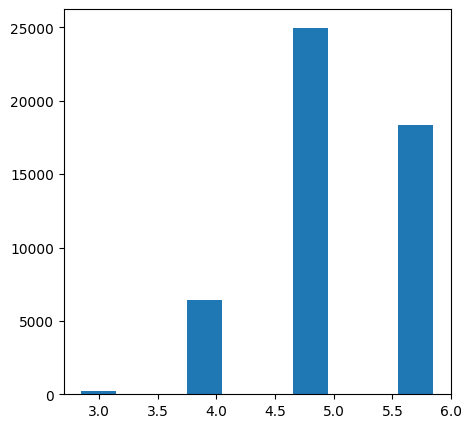

In [ ]:

plt.figure(figsize=(5,5))
plt.hist(markov_chain_40000["Presidential Republican Districts"], align = 'left')
plt.show()
plt.figure(figsize=(5,5))
plt.hist(markov_chain_50000["Presidential Republican Districts"], align = 'left')
plt.show()

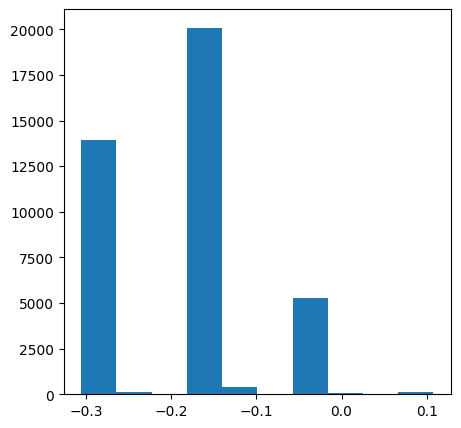

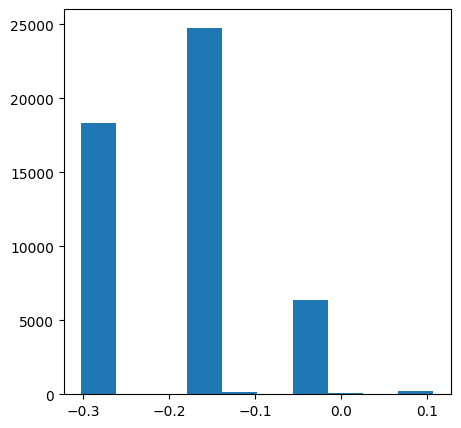

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(markov_chain_40000["Presidential Efficiency Gap"], align = 'left')
plt.show()
plt.figure(figsize=(5,5))
plt.hist(markov_chain_50000["Presidential Efficiency Gap"], align = 'left')
plt.show()

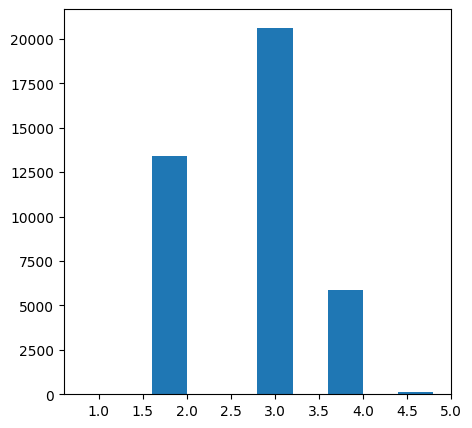

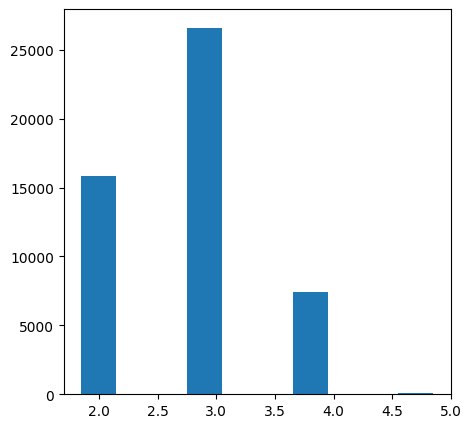

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(markov_chain_40000["Governor Democratic Districts"], align = 'left')
plt.show()
plt.figure(figsize=(5,5))
plt.hist(markov_chain_50000["Governor Democratic Districts"], align = 'left')
plt.show()

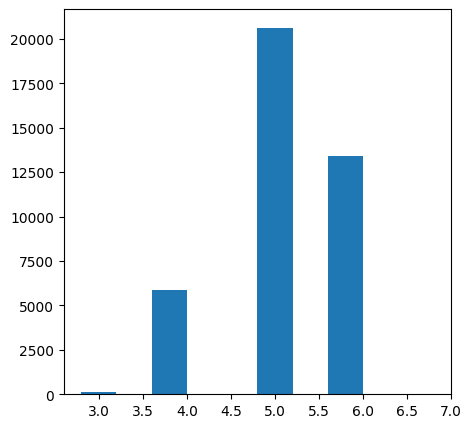

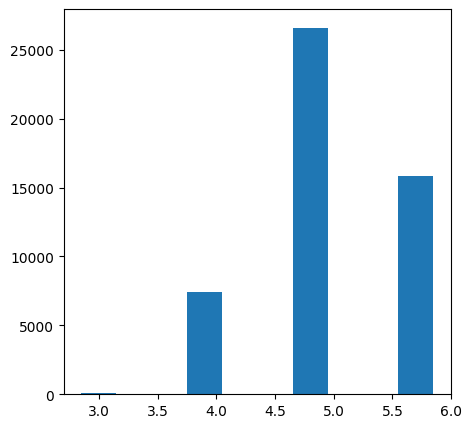

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(markov_chain_40000["Governor Republican Districts"], align = 'left')
plt.show()
plt.figure(figsize=(5,5))
plt.hist(markov_chain_50000["Governor Republican Districts"], align = 'left')
plt.show()

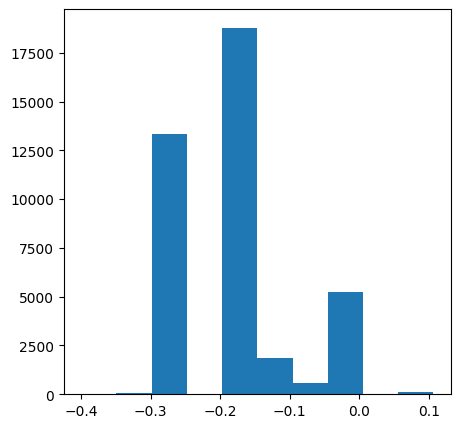

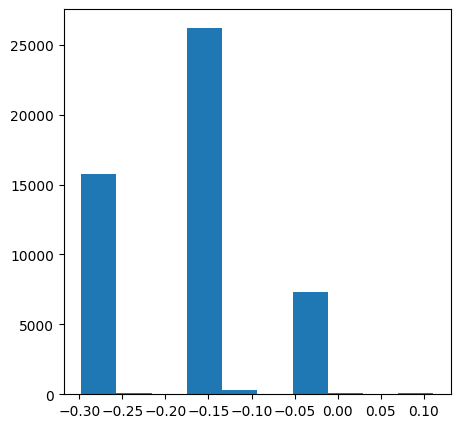

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(markov_chain_40000["Governor Efficiency Gap"], align = 'left')
plt.show()
plt.figure(figsize=(5,5))
plt.hist(markov_chain_50000["Governor Efficiency Gap"], align = 'left')
plt.show()